In [1]:
import librosa
import librosa.display
from scipy.io import wavfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tqdm import tqdm

from utils import *

/Users/lorenzo/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load training and evaluation csv

path = './summer_2022_project/'
audio_path = path + 'audio/'

df = pd.read_csv(path+'development.csv', dtype={'filename':'string', 'emotion':'string'}) # set string as type
eval_df = pd.read_csv(path+'evaluation.csv', dtype={'filename':'string'}) # set string as type

labels = df.emotion.unique()
labels_dict = {v:k for k,v in enumerate(labels)} #needed to transform categorical labels

df['encoded_emotion'] = df['emotion'].map(labels_dict)
filenames = list(df.filename)
df.head()

,emotion,filename,encoded_emotion
0,Disgusted,0.wav,0
1,Fearful,1.wav,1
2,Neutral,2.wav,2
3,Happy,3.wav,3
4,Angry,4.wav,4


/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_6406/1699259855.py:7: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(signal, sr)


Text(0.5, 1.0, "Waveform of '0.wav'")

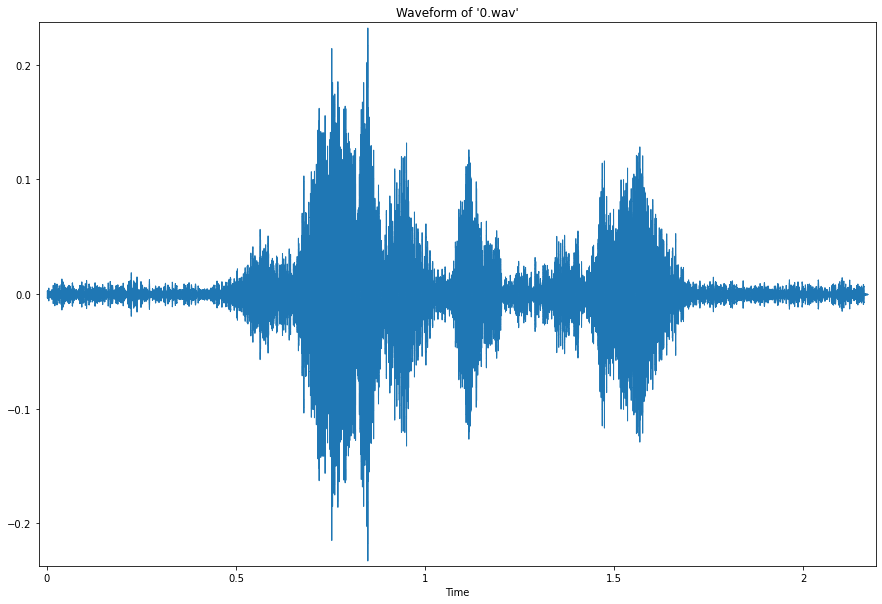

In [23]:
# Example of audio waveform (time domain)
filenames = list(df.filename)
audio_file = audio_path+filenames[0]
signal, sr = librosa.load(audio_file, sr=None, res_type='kaiser_fast', mono=True)

plt.figure(figsize=(15,10))
librosa.display.waveshow(signal, sr)
plt.margins(x=0.01, y=0.01) # set to 1% to margin parameters
plt.title(f"Waveform of '{filenames[0]}'")

(array([3.04131512e+00, 1.99538171e+00, 3.23680783e-01, ...,
        4.33812191e-03, 4.62526857e-03, 2.95131803e-05]),
 array([0.00000000e+00, 4.61041955e-01, 9.22083910e-01, ...,
        3.99907792e+03, 3.99953896e+03, 4.00000000e+03]),
 <matplotlib.lines.Line2D at 0x1a61eada0>)

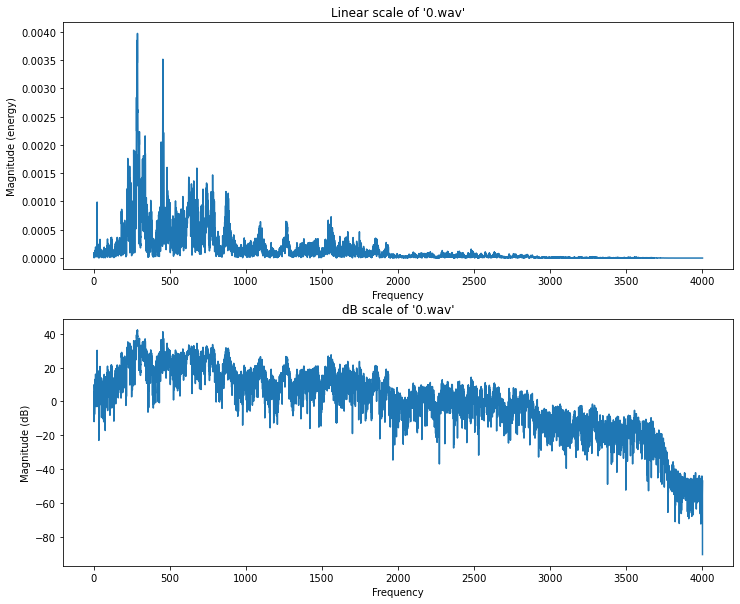

In [96]:
# Plot frequency domain

# set figure dimension
plt.figure(figsize=(12,10))

# plot linear energy over frequency 
plt.subplot(2,1,1)
plt.title(f"Linear scale of '{filenames[0]}'")
plt.magnitude_spectrum(signal, sr, scale='linear')
# plot log energy over frequency (as human perceive)
plt.subplot(2,1,2)
plt.title(f"dB scale of '{filenames[0]}'")
plt.magnitude_spectrum(data, rate, scale='dB')


By inspection, we can say that all audios have been sampled with the same sampling rate

## Denoise

In [11]:
import noisereduce as nr

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_6406/1888264314.py:6: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(signal, sr, label='original', alpha=.3)#, ax=ax[i])
/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_6406/1888264314.py:10: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(reduced_signal, sr, label='denoised', alpha=.9, color='tab:blue')#, ax=ax[i])


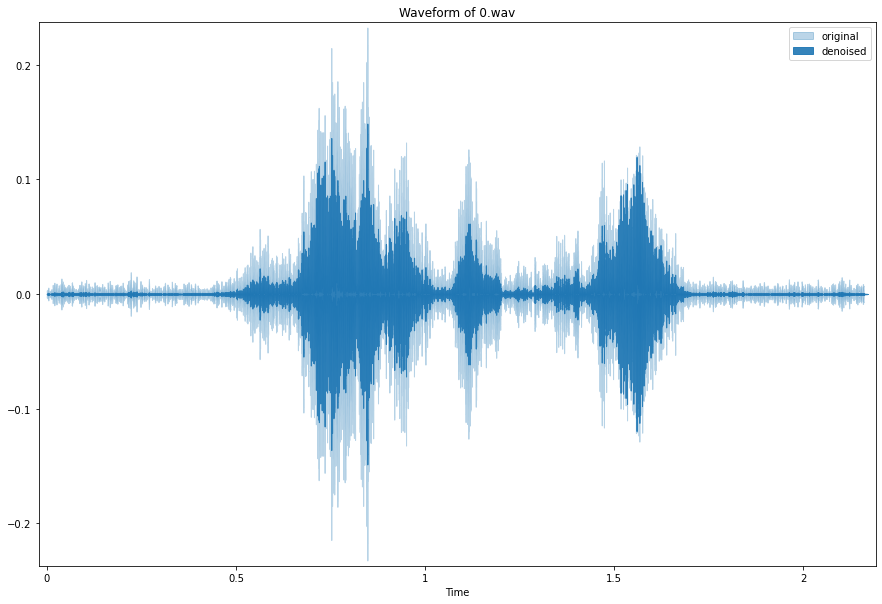

In [132]:
audio_file = audio_path+filenames[0]
signal, sr = librosa.load(audio_file, sr=None, res_type='kaiser_fast', mono=True)
#print(librosa.feature.spectral_centroid(signal, sr)[0].shape)
plt.figure(figsize=(15,10))
plt.title(f'Waveform of {filenames[0]}')
librosa.display.waveshow(signal, sr, label='original', alpha=.3)#, ax=ax[i])
plt.margins(x=0.01, y=0.01) # set to 1% to margin parameters

reduced_signal = nr.reduce_noise(signal, sr)
librosa.display.waveshow(reduced_signal, sr, label='denoised', alpha=.9, color='tab:blue')#, ax=ax[i])
plt.margins(x=0.01, y=0.01) # set to 1% to margin parameters
plt.legend()
plt.show()

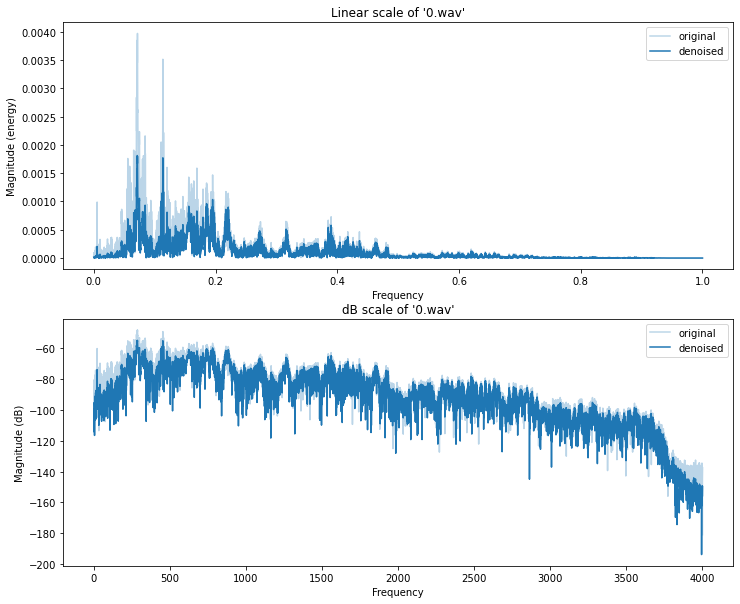

In [98]:
# differences in frequency domain

# set figure dimension
plt.figure(figsize=(12,10))

# plot linear energy over frequency 
plt.subplot(2,1,1)
plt.title(f"Linear scale of '{filenames[0]}'")
plt.magnitude_spectrum(signal, scale='linear', alpha=.3, label='original')
plt.magnitude_spectrum(reduced_signal, scale='linear', label='denoised', color='tab:blue')
plt.margins(x=0.05, y=0.05) # set to 1% to margin parameters

plt.legend()

# plot log energy over frequency (as human perceive)
plt.subplot(2,1,2)
plt.title(f"dB scale of '{filenames[0]}'")
plt.magnitude_spectrum(signal, sr, scale='dB', alpha=.3, label='original')
plt.magnitude_spectrum(reduced_signal, sr, scale='dB', label='denoised', color='tab:blue')
plt.margins(x=0.05, y=0.05) # set to 1% to margin parameters

plt.legend()

## Remove leading and trailing silences

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_6406/3036014605.py:9: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(signal, sr)
/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_6406/3036014605.py:14: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(trimmed_signal, sr)


Text(0.5, 1.0, "Trimmed and denoised waveform of '0.wav'")

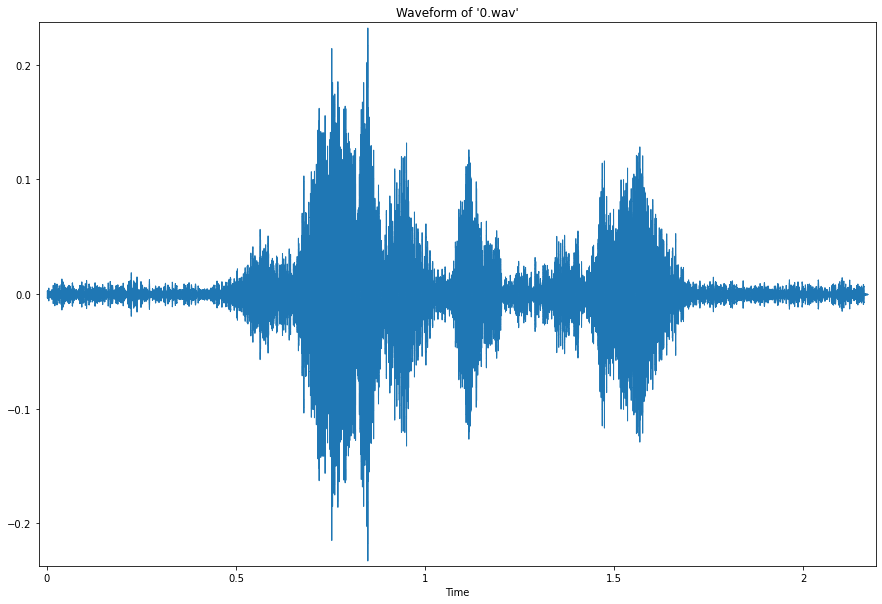

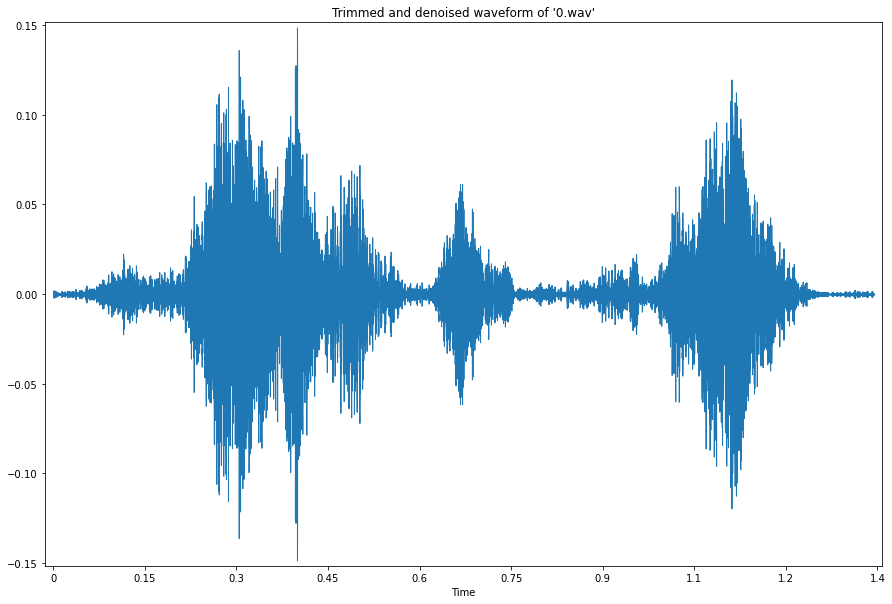

In [133]:
# audio file 0
audio_file = audio_path+filenames[0]
signal, sr = librosa.load(audio_file, sr=None, res_type='kaiser_fast', mono=True)
reduced_signal = nr.reduce_noise(signal, sr)
# trim using librosa and default dB threshold
trimmed_signal, index = librosa.effects.trim(reduced_signal, top_db=30)

plt.figure(figsize=(15,10))
librosa.display.waveshow(signal, sr)
plt.margins(x=0.01, y=0.01) # set to 1% to margin parameters
plt.title(f"Waveform of '{filenames[0]}'")

plt.figure(figsize=(15,10))
librosa.display.waveshow(trimmed_signal, sr)
plt.margins(x=0.01, y=0.01) # set to 1% to margin parameters
plt.title(f"Trimmed and denoised waveform of '{filenames[0]}'")

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_6406/3631203805.py:9: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(signal, sr)
/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_6406/3631203805.py:14: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(trimmed_signal, sr)


Text(0.5, 1.0, "Trimmed and denoised waveform of '2.wav'")

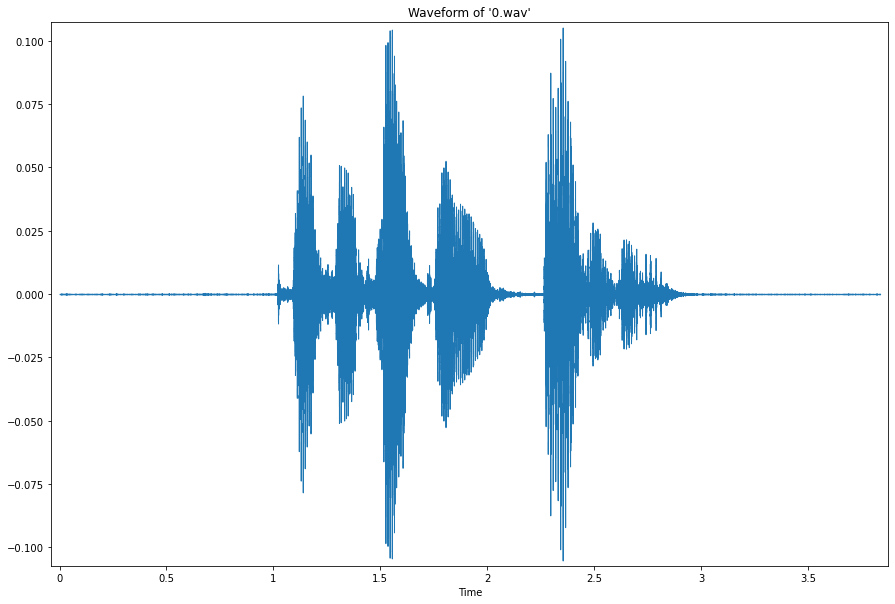

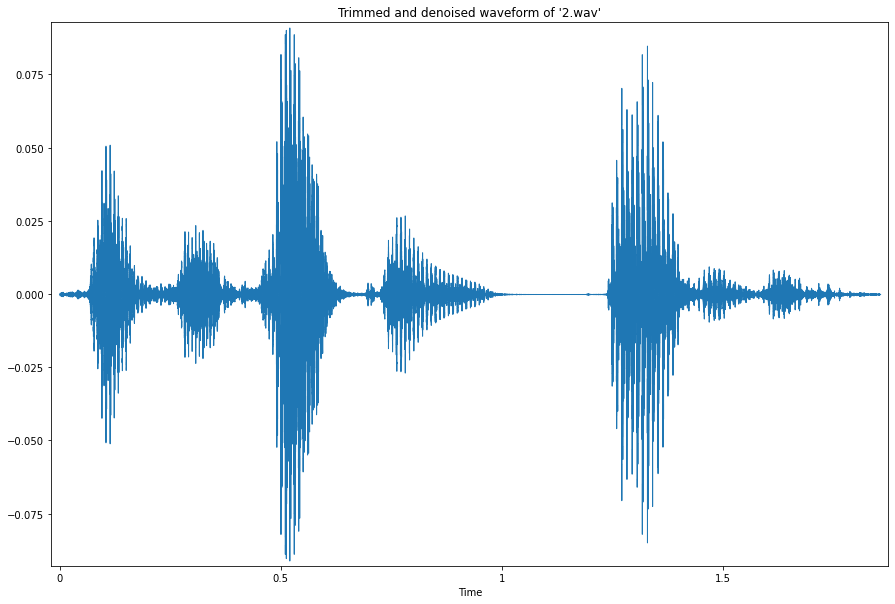

In [75]:
# audio file 3
audio_file = audio_path+filenames[3]
signal, sr = librosa.load(audio_file, sr=None, res_type='kaiser_fast', mono=True)
reduced_signal = nr.reduce_noise(signal, sr)
# trim using librosa and default dB threshold
trimmed_signal, index = librosa.effects.trim(reduced_signal, top_db=30)

plt.figure(figsize=(15,10))
librosa.display.waveshow(signal, sr)
plt.margins(x=0.01, y=0.01) # set to 1% to margin parameters
plt.title(f"Waveform of '{filenames[0]}'")

plt.figure(figsize=(15,10))
librosa.display.waveshow(trimmed_signal, sr)
plt.margins(x=0.01, y=0.01) # set to 1% to margin parameters
plt.title(f"Trimmed and denoised waveform of '{filenames[2]}'")

By checking manually, 30 db is a good threshold to remoive leading and trailing silences.

In [3]:
# functions to process and visualize data

import noisereduce as nr
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def load_file(audio_file, normalized=True) ->  tuple:
    if normalized:
        signal, sr = librosa.load(audio_file, sr=None, res_type='kaiser_fast', mono=True)
    else:
        sr, signal = wavfile.read(audio_file)
    return signal, sr

def is_normalized(signal):
    if max(np.abs(signal)) <= 1:
        return True
    else:
        return False
        
def plot_waveform(signal, sr, title, figsize=(15,10), margins=(0.01,0.01), **kwargs):
    plt.figure(figsize=figsize)
    plt.title(title)
    time_points = np.linspace(0, len(signal)/sr, len(signal))
    plt.plot(time_points, signal)
    plt.xlabel('Time (s)')
    # check wether the signal is normalized or not
    if is_normalized(signal):
        plt.ylabel('Normalized amplitude')
    else: 
        plt.ylabel('Amplitude')
    
    if margins != None:
        x = margins[0]
        y = margins[1]
        plt.margins(x=x, y=y) 

def plot_linear_magnitude_spectrum(signal, sr, filename, margins=(0.01,0.01),  **kwargs):
    plt.title(f"Linear scale of {filename}")
    plt.magnitude_spectrum(signal, sr, scale='linear', **kwargs)
    plt.xlabel('Frequency (Hz)')
    if margins != None:
        x = margins[0]
        y = margins[1]
        plt.margins(x=x, y=y) 

def plot_db_magnitude_spectrum(signal, sr, filename, margins=(0.01,0.01), **kwargs):
    plt.title(f"dB scale of {filename}")
    plt.magnitude_spectrum(signal, sr, scale='dB', **kwargs)
    plt.xlabel('Frequency (Hz)')
    if margins != None:
        x = margins[0]
        y = margins[1]
        plt.margins(x=x, y=y) 

def plot_magnitude_spectrums(signal, sr, filename, margins=(0.03,0.03), figsize=(15,10)):
    # set figure dimension
    plt.figure(figsize=figsize)
    
    # plot linear energy over frequency 
    plt.subplot(2,1,1)
    plot_linear_magnitude_spectrum(signal, sr, filename, margins)
    
    # plot log energy over frequency (as human perceive)
    plt.subplot(2,1,2)
    plot_db_magnitude_spectrum(signal, sr, filename, margins)

'''def plot_comparison(signal1, signal2, sr, dictionary, figsize=(15,10), kind='waveform'):
    """plot the comparison between the same audio, original and processed.
    Hence it will have the same sample rate (sr).

    Args:
        signal1 (_type_): _description_
        signal2 (_type_): _description_
        sr (_type_): _description_
        dictionary (_type_): dictionary containing **kwargs of each signal plot
        kind (str, optional): _description_. Defaults to 'waveform'.
    """
    
    plt.figure(figsize=figsize)
    
    d1_kwargs = dictionary['signal1']
    d2_kwargs = dictionary['signal2']
    
    if kind == 'frequency':
        plot_magnitude_spectrums(signal1, sr, d1_kwargs)
        plot_magnitude_spectrums(signal2, sr, d2_kwargs)
    else:
        plot_waveform(signal1, sr, d1_kwargs)
        plot_waveform(signal2, sr, d2_kwargs)'''
        

def denoise(signal, sr):
    return nr.reduce_noise(signal, sr)

def trim_silence(signal, top_db=30):
    trimmed_signal, index = librosa.effects.trim(signal, top_db=top_db)
    return trimmed_signal

def denoise_and_trim(signal, sr, top_db=30):
    denoised_signal = denoise(signal, sr)
    return trim_silence(denoised_signal, top_db)

def compute_mfccs(signal, sr, n_mfcc=13):
    return librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)

def extract_mfccs(signal, sr, n_mfcc=13, axis=-1):
    mfccs = compute_mfccs(y=signal, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs, axis=axis)
    mfccs_std = np.std(mfccs, axis=axis)
    return mfccs_mean, mfccs_std

def extract_delta(signal, sr, n_mfcc=13, order=1, precomputed_mfccs=None, axis=-1):
    if precomputed_mfccs != None:
        mean = np.mean(librosa.feature.delta(precomputed_mfccs, order=order), axis=-1)
        std = np.std(librosa.feature.delta(precomputed_mfccs, order=order), axis=-1)
        return mean, std
    else:
        mfccs = compute_mfccs(y=signal, sr=sr, n_mfcc=n_mfcc)  
        mean = np.mean(librosa.feature.delta(mfccs, order=order), axis=-1)
        std = np.std(librosa.feature.delta(mfccs), order=order, axis=-1)
        return mean, std

def compute_stft(signal):
    return np.abs(librosa.stft(signal))

def extract_chroma(signal, sr, axis):
    stft = compute_stft(signal)
    chroma = librosa.feature.chroma_stft(S=stft, sr=sr)
    mean = np.mean(chroma, axis=axis)
    std = np.std(chroma, axis=axis)
    return mean, std


def concatenate_all_features(list_of_features, axis=-1):
    return np.concatenate(list_of_features, axis=axis)

## prova funzioni

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


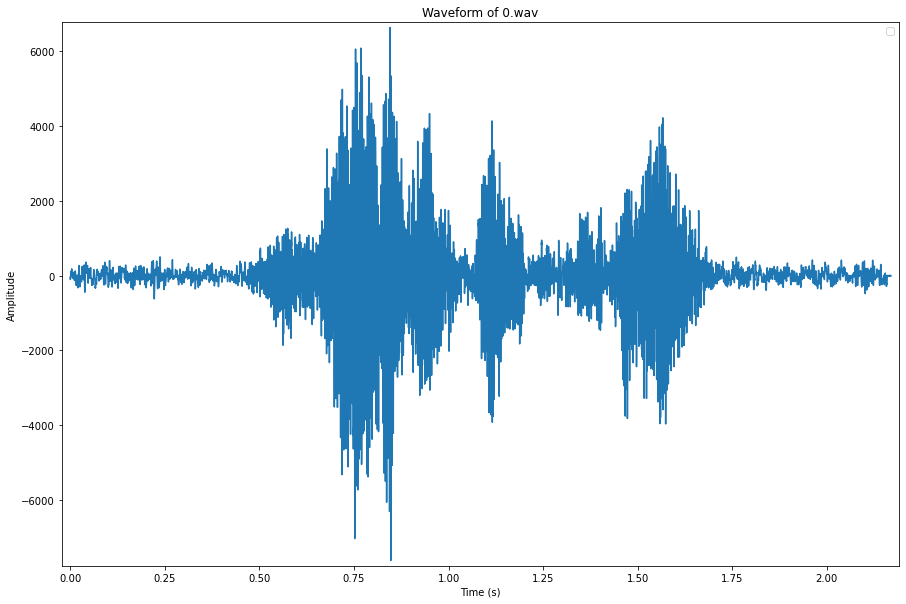

In [121]:
file_name = filenames[0]
audio_file = audio_path + file_name
signal, sr = load_file(audio_file, normalized=False)
plot_waveform(signal, sr, title=f'Waveform of {file_name}', label='original', alpha=.5)
plt.legend()

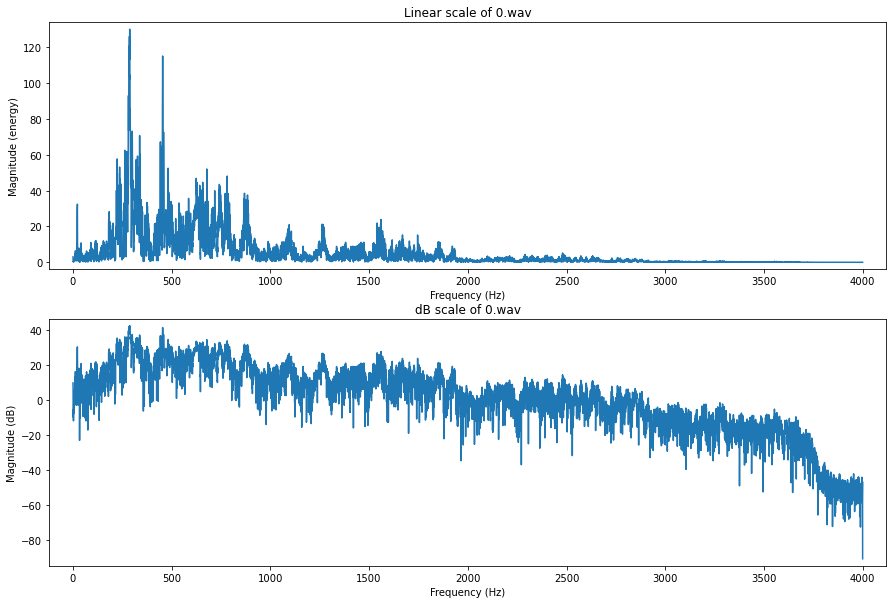

In [122]:
plot_magnitude_spectrums(signal, sr, file_name)

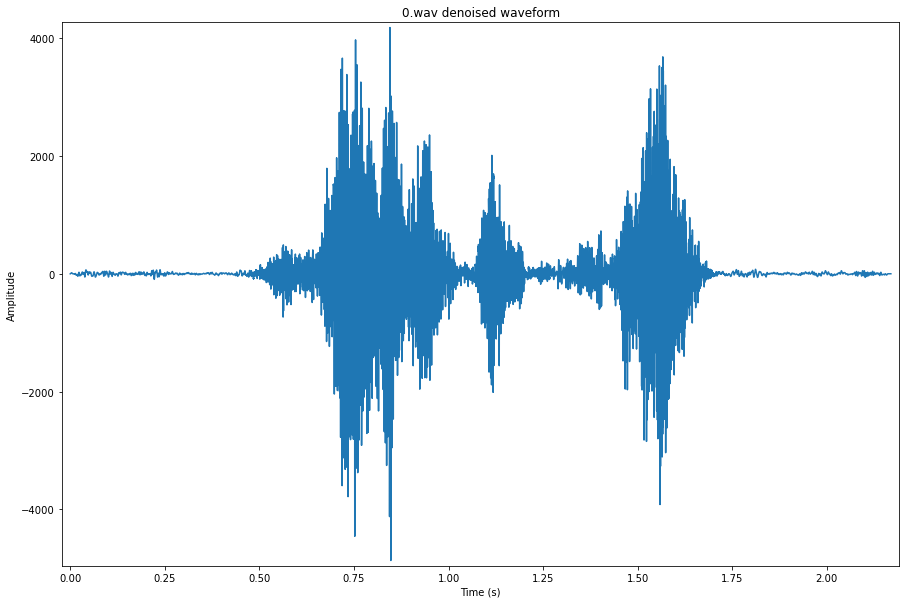

In [124]:
# denoise
reduced_signal = denoise(signal, sr)
plot_waveform(reduced_signal, sr, f'{file_name} denoised waveform')

In [147]:
trimmed_signal = trim_silence(reduced_signal)
trimmed_signal

array([ 1.4027264e-03,  1.5406086e-03,  1.6600547e-03, ...,
        1.9553883e-04,  8.4535604e-05, -3.8461952e-05], dtype=float32)

In [148]:
trimmed_signal1 = denoise_and_trim(signal, sr, 30)
np.allclose(trimmed_signal, trimmed_signal1)

True

i confronti vanno fatti a mano

In [4]:
df

,emotion,filename,encoded_emotion
0,Disgusted,0.wav,0
1,Fearful,1.wav,1
2,Neutral,2.wav,2
3,Happy,3.wav,3
4,Angry,4.wav,4
...,...,...,...
9592,Happy,9592.wav,3
9593,Happy,9593.wav,3
9594,Sad,9594.wav,5
9595,Happy,9595.wav,3


In [5]:
audio_path

'./summer_2022_project/audio/'

In [6]:
silence_files = []
signals = dict()
for filename in filenames:
    signal, sr = load_file(audio_path+filename, normalized=True)
    processed_signal = denoise_and_trim(signal, sr, top_db=30)
    
    # check if the signal is empty (hence it contains just silence)
    if processed_signal.size == 0:
        silence_files.append(filename)
        print(filename)
        continue
    
    signals[filename] = processed_signal
    

/Users/lorenzo/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/noisereduce/noisereduce.py:306: RuntimeWarning: invalid value encountered in true_divide
  sig_mult_above_thresh = (abs_sig_stft - sig_stft_smooth) / sig_stft_smooth


8005.wav


In [7]:
# transform silence files to the corresponding index
rows_to_remove = [(int)(file.split('.')[0]) for file in silence_files]
 
df.drop(index=rows_to_remove, inplace=True)
df

,emotion,filename,encoded_emotion
0,Disgusted,0.wav,0
1,Fearful,1.wav,1
2,Neutral,2.wav,2
3,Happy,3.wav,3
4,Angry,4.wav,4
...,...,...,...
9592,Happy,9592.wav,3
9593,Happy,9593.wav,3
9594,Sad,9594.wav,5
9595,Happy,9595.wav,3


In [12]:
# check if the rows were deleted
for row in rows_to_remove:
    try:
        print(df.loc[row])
    except:
        print(f'Row {row} not found')
    
    try:
        print(signals[f'{row}.wav'])
    except:
        print(f'Signal {row}.wav is not present')

Row 8005 not found
Signal 8005.wav is not present


In [42]:
# check if all signals have the same time length (spoiler, no)
# They have different number of frames

for i in range(10):
    print(f'{i}.wav length:', signals[f'{i}.wav'].shape[0])
    

0.wav length: 10752
1.wav length: 21356
2.wav length: 14848
3.wav length: 12288
4.wav length: 15360
5.wav length: 15483
6.wav length: 12288
7.wav length: 14848
8.wav length: 16896
9.wav length: 15959


we have to extract the same number of features from each sample.

Features we want to extract:
- MFCCs (13, 40 coefficients) and its deltas:
  - delta1
  - delta2
- Zero Crossing Rate
- Root Mean Square Energy
- Chroma feature (12 classes, one for each pitch profile). Strongly used in music
- Pitch (?) (strongly related with fundamental frequency $F_0$). Pitch of voice is important to recognize the emotion. 
- LPC coefficients (of what order? The 1st coefficients is always 1)
- Fundamental frequency $F_0$ (strongly related)
- Spectral centroid (consigliato da Valerio)
- Spectral roll off (right skewness of the power spectrum. Non saprei sinceramente. Non capisco)

_Notes_:
$F_0$ and pitch are strongly related. Fundamental frequency is the physical phenomenon while the pitch is how human perceives such phenomenon. [Source here](https://wiki.aalto.fi/pages/viewpage.action?pageId=149890776)

In [11]:
signals

{'0.wav': array([ 1.4027264e-03,  1.5406086e-03,  1.6600547e-03, ...,
         1.9553883e-04,  8.4535604e-05, -3.8461952e-05], dtype=float32),
 '1.wav': array([ 6.0413027e-04,  9.2214544e-04,  7.8881369e-04, ...,
        -1.5303708e-06, -2.5928003e-07, -8.1126751e-07], dtype=float32),
 '2.wav': array([ 1.0771854e-04, -6.5876164e-05,  1.2101517e-04, ...,
         6.1975188e-06, -7.0716469e-06, -8.0637956e-06], dtype=float32),
 '3.wav': array([-4.4409030e-06, -2.0759569e-06, -3.9162983e-06, ...,
         1.2155656e-06, -1.2823551e-06,  1.1023509e-06], dtype=float32),
 '4.wav': array([ 1.7753508e-05,  1.0331896e-06, -5.0269380e-05, ...,
        -1.2988696e-04, -7.0231850e-05, -1.7589953e-05], dtype=float32),
 '5.wav': array([-2.6427236e-04, -7.2735263e-04, -3.2312973e-04, ...,
        -9.7612734e-05, -9.0878282e-05, -4.6697340e-05], dtype=float32),
 '6.wav': array([1.5354710e-06, 7.9070145e-05, 1.5226640e-04, ..., 1.8573832e-03,
        1.8042366e-03, 1.7318401e-03], dtype=float32),
 '7.w